<a href="https://colab.research.google.com/github/kwangyoulsagong/Computer_Vision_Lab/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84_Assignment_1_201901565_%EC%82%AC%EA%B3%B5%EA%B4%91%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

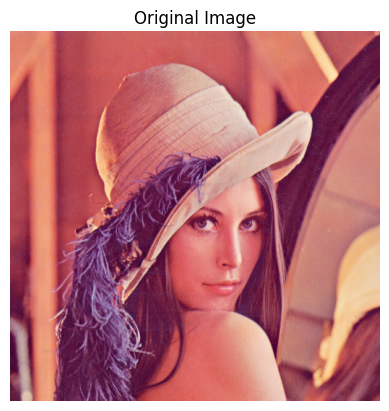

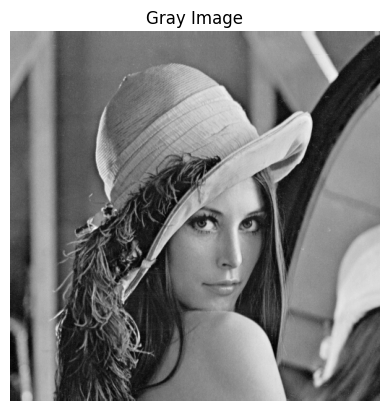

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = "/content/Lenna.png"  #이미지 경로
image = Image.open(image_path) #이미지 오픈

# 이미지 변환 (RGB to numpy array)
image = np.array(image)

# 이미지 시각화
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

# 'rgb2gray' 함수 정의
def rgb2gray(image):
    gray_image = np.dot(image[..., :3], [0.299, 0.587, 0.114]) #그레이 도트
    return gray_image

# RGB를 gray 이미지로 변환
image_gray = rgb2gray(image)

# gray 이미지 시각화
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.title("Gray Image")
plt.show()


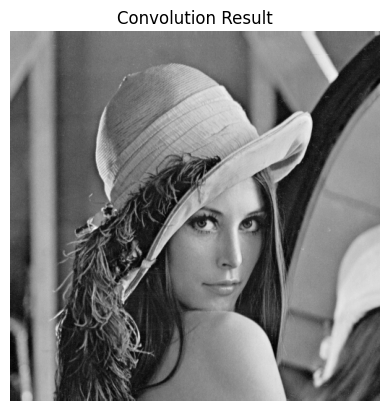

In [ ]:
# identity 커널 정의
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

# 'conv2d' 함수 정의
def conv2d(image, kernel):
    # 선형변환 커널 레인지
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    # 패딩 크기
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2
    # 빈 이미지
    output = np.zeros_like(image)
    # 패딩 0
    padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')
    # 컨볼루션
    for i in range(image_height):
        for j in range(image_width):
            output[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)
    return output

# 이미지에 컨벌루션 적용
image_conv = conv2d(image_gray, kernel)

# 컨벌루션 결과 시각화
plt.imshow(image_conv, cmap='gray')
plt.axis('off')
plt.title("Convolution Result")
plt.show()


In [ ]:
from math import log10, sqrt

# 'PSNR' 함수 정의
def PSNR(original, filtered):
    # 같은 모양과 같은 데이터 타입
    if original.shape != filtered.shape:
        raise ValueError("Input images must have the same dimensions")

    # 중간값 가중치 계산
    mse = np.mean((original - filtered) ** 2)

    # 최대 픽셀 값
    max_pixel_value = 255.0

    # psnr 계산
    psnr = 20 * log10(max_pixel_value / sqrt(mse))

    return psnr



In [ ]:
### 3 by 3 평균 블러 커널 정의
kernel_avg_3x3 = np.array([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]]) / 9

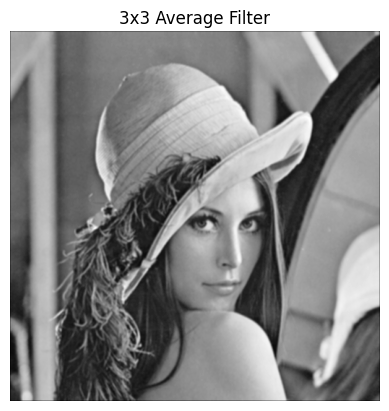

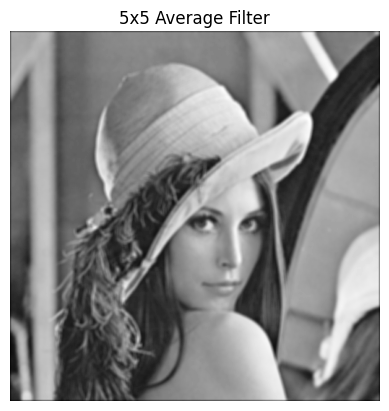

In [ ]:


### 불러온 이미지에 3 by 3 평균 블러 커널 적용
image_blurred_3x3 = conv2d(image_gray, kernel_avg_3x3)

### 컨벌루션 결과 시각화
plt.imshow(image_blurred_3x3, cmap='gray')
plt.axis('off')
plt.title("3x3 Average Filter")
plt.show()

### PSNR 계산
psnr_3x3 = PSNR(image_gray, image_blurred_3x3)

### 5 by 5 평균 블러 커널 정의
kernel_avg_5x5 = np.array([[1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1],
                            [1, 1, 1, 1, 1]]) / 25

### 불러온 이미지에 5 by 5 평균 블러 커널 적용
image_blurred_5x5 = conv2d(image_gray, kernel_avg_5x5)

### 컨벌루션 결과 시각화
plt.imshow(image_blurred_5x5, cmap='gray')
plt.axis('off')
plt.title("5x5 Average Filter")
plt.show()

### PSNR 계산
psnr_5x5 = PSNR(image_gray, image_blurred_5x5)


In [ ]:
from random import random

### 'salt_and_pepper' 함수 정의
def salt_and_pepper(image, noise_prob=0.05):
    noisy_image = np.copy(image)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            if random() < noise_prob:
                noisy_image[i, j] = 0  # Set pixel to black (0)
            elif random() < noise_prob:
                noisy_image[i, j] = 255  # Set pixel to white (255)

    return noisy_image

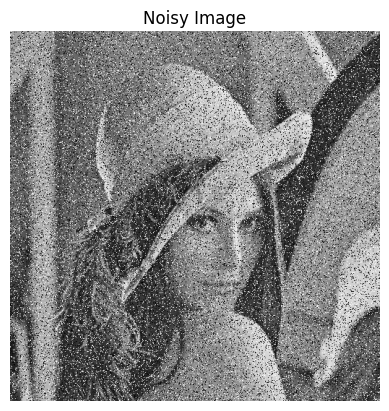

In [ ]:


### 이미지에 salt_and_pepper 함수 적용
image_noisy = salt_and_pepper(image_gray, noise_prob=0.1)  # You can adjust the noise probability

### 컨벌루션 결과 시각화
plt.imshow(image_noisy, cmap='gray')
plt.axis('off')
plt.title("Noisy Image")
plt.show()

### PSNR 계산
psnr_noisy = PSNR(image_gray, image_noisy)



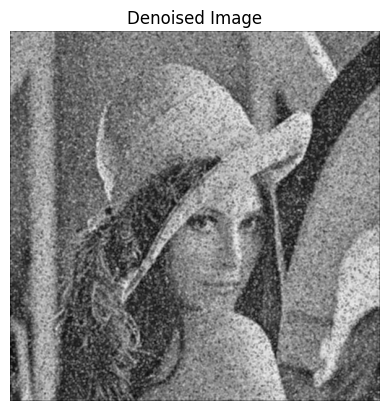

In [ ]:
### 3 by 3 평균 블러 커널 활용하여 denoise 수행
kernel_avg_denoise = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]]) / 9

image_denoise = conv2d(image_noisy, kernel_avg_denoise)

### 컨벌루션 결과 시각화
plt.imshow(image_denoise, cmap='gray')
plt.axis('off')
plt.title("Denoised Image")
plt.show()

### PSNR 계산
psnr = PSNR(image_gray, image_denoise)


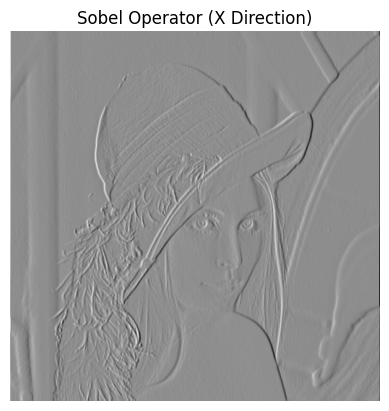

In [ ]:
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

### 이미지에 컨벌루션 적용 (x 방향)
image_sobel_x = conv2d(image_gray, kernel_x)

### 컨벌루션 결과 시각화 (x 방향)
plt.imshow(image_sobel_x, cmap='gray')
plt.axis('off')
plt.title("Sobel Operator (X Direction)")
plt.show()

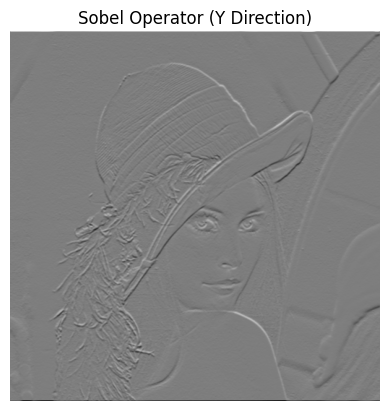

In [ ]:
### y 방향으로 3 by 3 sobel 연산자 정의
kernel_y = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

### 이미지에 컨벌루션 적용 (y 방향)
image_sobel_y = conv2d(image_gray, kernel_y)

### 컨벌루션 결과 시각화 (y 방향)
plt.imshow(image_sobel_y, cmap='gray')
plt.axis('off')
plt.title("Sobel Operator (Y Direction)")
plt.show()
